BLACK FRIDAY SALES PREDICTION

IMPORTING DEPENDENCIES

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [35]:
df = pd.concat(
    map(pd.read_csv, ['train.csv', 'test.csv']), ignore_index=True)

DATA PREPROCESSING

In [36]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [37]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [39]:
#finding unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
dtype: int64

In [40]:
#dropping irrelevant columns
df = df.drop(columns=['User_ID', 'Product_ID'])

In [41]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


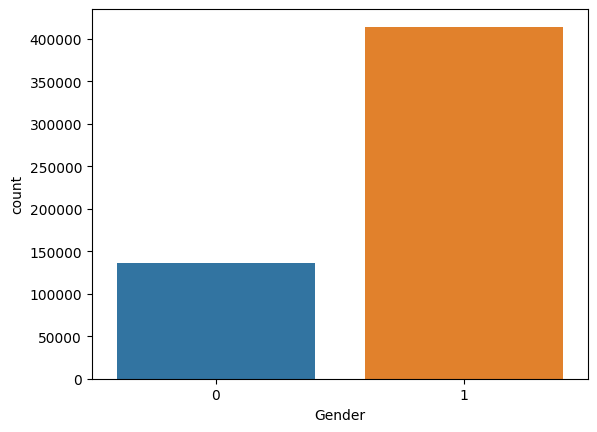

In [79]:
sns.countplot(x="Gender", data=df)
plt.show()

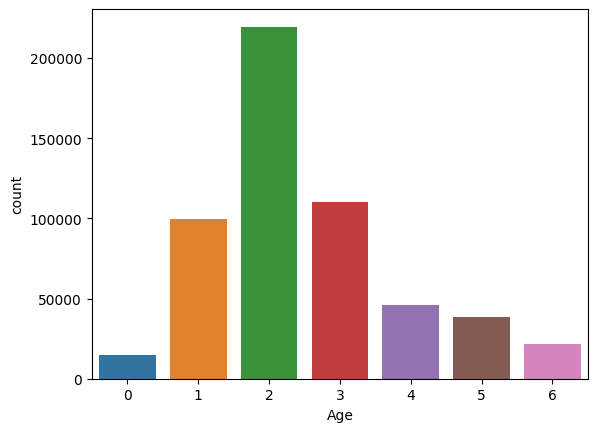

In [80]:
sns.countplot(x="Age", data=df)
plt.show()

<Axes: xlabel='Purchase', ylabel='Density'>

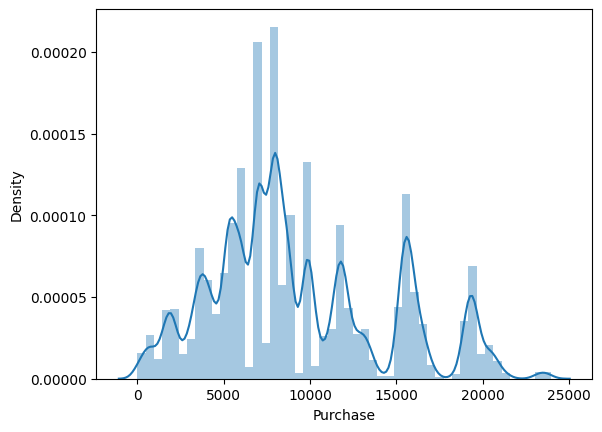

In [81]:
sns.distplot(df["Purchase"])

<Axes: >

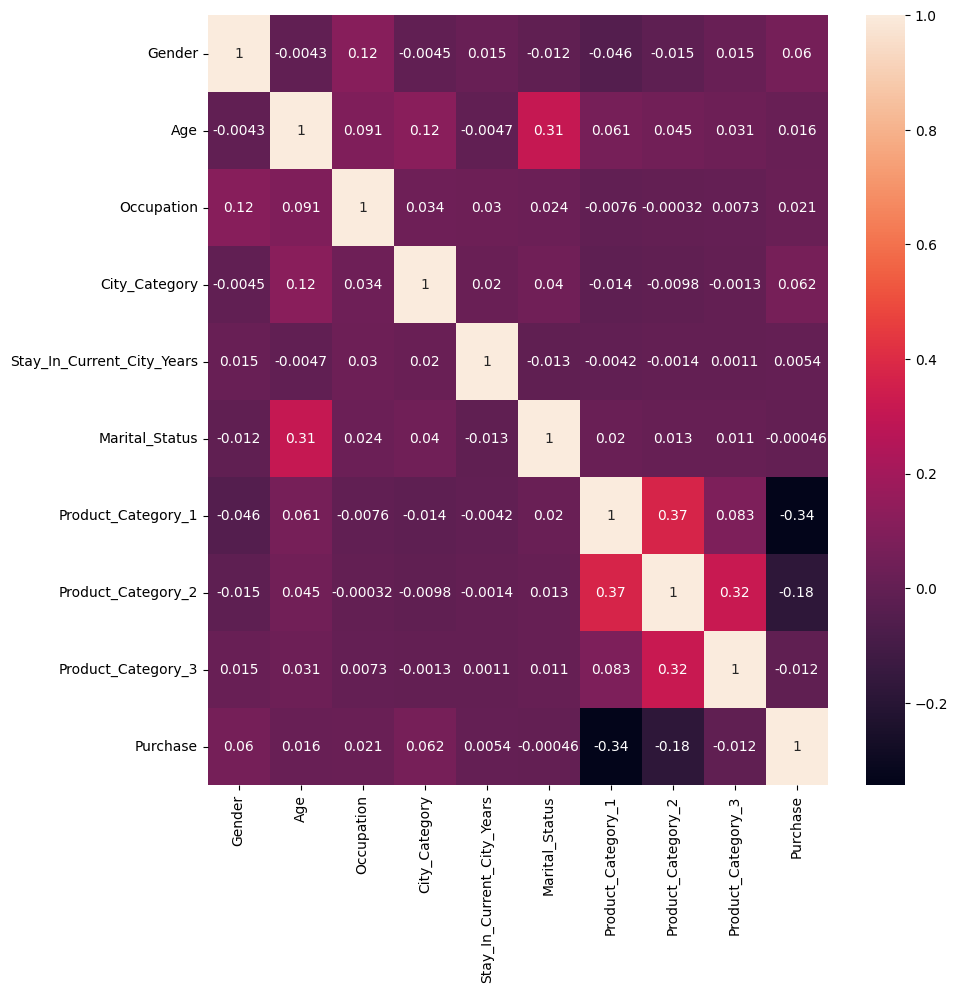

In [82]:
#Correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [43]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [44]:
df.Product_Category_2.describe()

count    537685.000000
mean          9.844506
std           5.089093
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [45]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [46]:
df.Product_Category_3.describe()

count    237858.000000
mean         12.668605
std           4.125510
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [47]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [48]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [49]:
df=df.dropna()

In [50]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

LABEL ENCODING

In [51]:
cols = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years']
le = preprocessing.LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [52]:
X = df.drop(columns=['Purchase'])
y = df['Purchase']

In [53]:
y.shape

(550068,)

MODEL TRAINING

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MAE, mean_squared_error as MSE, r2_score as R2
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [57]:
#linear regression
lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [61]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)


Predicted purchases (in dollars) for new costumers: [12837.82050877 10582.33640343  7003.59728295 ...  8072.98482845
  6803.66808048  9749.7734488 ]


In [63]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
print(dt.fit(x_train, y_train))

DecisionTreeRegressor()


In [64]:
dt_predictions = dt.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", dt_predictions)


Predicted purchases (in dollars) for new costumers: [15790.          8300.          5706.71428571 ...  6966.64285714
  3176.5         9503.53333333]


In [69]:
xg = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xg.fit(x_train, y_train)
print(xg.fit(x_train, y_train))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


In [70]:
xg_predictions = xg.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", xg_predictions)


Predicted purchases (in dollars) for new costumers: [14109.659  13631.674   7428.909  ...  7208.125   4425.1753  9598.983 ]


In [72]:
rf= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
rf.fit(x_train, y_train)
print(rf.fit(x_train, y_train))

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101)


In [73]:
rf_predictions = rf.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", rf_predictions)


Predicted purchases (in dollars) for new costumers: [14013.03129562 13046.94903957  7694.30721399 ...  7694.30721399
  4895.51549327  9722.74106238]


In [77]:
print("FINAL RESULTS : ")

print("Results for Linear Regression : ")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions),"\n")

print("Results for Decision tree Regressor: ")
print('MAE:', metrics.mean_absolute_error(y_test, dt_predictions))
print('MSE:', metrics.mean_squared_error(y_test, dt_predictions),"\n")

print("Results for XG Boost: ")
print('MAE:', metrics.mean_absolute_error(y_test, xg_predictions))
print('MSE:', metrics.mean_squared_error(y_test, xg_predictions),"\n")

print("Results for Random Forest Regressor: ")
print('MAE:', metrics.mean_absolute_error(y_test, rf_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rf_predictions),"\n")

FINAL RESULTS : 
Results for Linear Regression : 
MAE: 3587.0764103761135
MSE: 21909593.99805038 

Results for Decision tree Regressor: 
MAE: 2365.3453712480054
MSE: 11198738.152905034 

Results for XG Boost: 
MAE: 2270.4106854990055
MSE: 8978867.661510546 

Results for Random Forest Regressor: 
MAE: 2420.0206555688787
MSE: 10763286.362120714 

